In [1]:
import iris
from iris.experimental.equalise_cubes import equalise_attributes
from iris.util import unify_time_units
import iris.analysis.cartography
import iris.coord_categorisation
import matplotlib.pyplot as pl
from climateforcing.utils import mkdir_p
import numpy as np
#import pickle
import scipy.stats as st
from tqdm import tqdm

In [2]:
import cartopy

## ToDo: revert these back

In [3]:
scenarios = {}
scenarios['ACCESS-CM2'] = {}
scenarios['ACCESS-CM2']['r1i1p1f1'] = ['historical', 'ssp126', 'ssp245', 'ssp585']
scenarios['CanESM5'] = {}
scenarios['CanESM5']['r1i1p2f1'] = ['historical', 'ssp126', 'ssp245', 'ssp585']
scenarios['CMCC-CM2-SR5'] = {}
scenarios['CMCC-CM2-SR5']['r1i1p1f1'] = ['historical', 'ssp245', 'ssp585']
scenarios['MRI-ESM2-0'] = {}
scenarios['MRI-ESM2-0']['r1i1p1f1'] = ['historical', 'ssp126', 'ssp245', 'ssp585']
scenarios['KACE-1-0-G'] = {}
scenarios['KACE-1-0-G']['r1i1p1f1'] = ['historical', 'ssp245']
scenarios['HadGEM3-GC31-MM'] = {}
scenarios['HadGEM3-GC31-MM']['r1i1p1f3'] = ['historical', 'ssp126', 'ssp585']
#scenarios['HadGEM3-GC31-LL'] = {}
#scenarios['HadGEM3-GC31-LL']['r1i1p1f3'] = ['historical', 'ssp126', 'ssp245', 'ssp585']
scenarios['BCC-CSM2-MR'] = {}
scenarios['BCC-CSM2-MR']['r1i1p1f1'] = ['historical', 'ssp126', 'ssp245', 'ssp585']
scenarios['CMCC-ESM2'] = {}
scenarios['CMCC-ESM2']['r1i1p1f1'] = ['historical', 'ssp126', 'ssp245', 'ssp585']

In [4]:
era5heatdir = '/gws/pw/j05/cop26_hackathons/bristol/project10/era5-heat_1deg_percentiles/'
#hadgemdir = '/gws/pw/j05/cop26_hackathons/bristol/project10/utci_projections_1deg_percentiles/HadGEM3-GC31-LL/historical/r1i1p1f3/'
#bccdir = '/gws/pw/j05/cop26_hackathons/bristol/project10/utci_projections_1deg/BCC-CSM2-MR/historical/r1i1p1f1/'

In [5]:
cube_era5 = iris.load(era5heatdir + 'ECMWF_utci_*_v1.0_con.nc')
equalise_attributes(cube_era5)
unify_time_units(cube_era5)
cube_era5 = cube_era5.merge().concatenate_cube()

In [6]:
cube_era5.shape

(30, 6, 180, 360)

In [7]:
cube_era5_mean = cube_era5.collapsed(['time'], iris.analysis.MEAN)
cube_era5_mean

/home/users/pmcjs/.conda/envs/heatstress/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


<iris 'Cube' of utci / (1) (percentile_over_time: 6; latitude: 180; longitude: 360)>

In [8]:
cube_model = {}
for model in scenarios:
    cube_model[model] = {}
    for run in scenarios[model]:
        cube_model[model][run] = {}
        for scen in scenarios[model][run]:
            cube_model[model][run][scen] = {}
            indir = '/gws/pw/j05/cop26_hackathons/bristol/project10/utci_projections_1deg_percentiles/%s/%s/%s/' % (model, scen, run)
            print(model, run, scen)
            cube_model_temp = iris.load(indir + 'utci_3hr_*.nc')
            equalise_attributes(cube_model_temp)
            unify_time_units(cube_model_temp)
            cube_model[model][run][scen] = cube_model_temp.merge().concatenate_cube()

ACCESS-CM2 r1i1p1f1 historical
ACCESS-CM2 r1i1p1f1 ssp126
ACCESS-CM2 r1i1p1f1 ssp245
ACCESS-CM2 r1i1p1f1 ssp585
CanESM5 r1i1p2f1 historical
CanESM5 r1i1p2f1 ssp126
CanESM5 r1i1p2f1 ssp245
CanESM5 r1i1p2f1 ssp585
CMCC-CM2-SR5 r1i1p1f1 historical
CMCC-CM2-SR5 r1i1p1f1 ssp245
CMCC-CM2-SR5 r1i1p1f1 ssp585
MRI-ESM2-0 r1i1p1f1 historical
MRI-ESM2-0 r1i1p1f1 ssp126
MRI-ESM2-0 r1i1p1f1 ssp245
MRI-ESM2-0 r1i1p1f1 ssp585
KACE-1-0-G r1i1p1f1 historical
KACE-1-0-G r1i1p1f1 ssp245
HadGEM3-GC31-MM r1i1p1f3 historical
HadGEM3-GC31-MM r1i1p1f3 ssp126
HadGEM3-GC31-MM r1i1p1f3 ssp585
BCC-CSM2-MR r1i1p1f1 historical
BCC-CSM2-MR r1i1p1f1 ssp126
BCC-CSM2-MR r1i1p1f1 ssp245
BCC-CSM2-MR r1i1p1f1 ssp585
CMCC-ESM2 r1i1p1f1 historical
CMCC-ESM2 r1i1p1f1 ssp126
CMCC-ESM2 r1i1p1f1 ssp245
CMCC-ESM2 r1i1p1f1 ssp585


In [9]:
cube_model[model][run][scen]

<iris 'Cube' of Universal Thermal Climate Index / (K) (time: 86; percentile_over_time: 6; latitude: 180; longitude: 360)>

In [10]:
cube_model_historical_mean = {}
for model in scenarios:
    cube_model_historical_mean[model] = {}
    for run in scenarios[model]:
        print(model, run)
        cube_model_historical_mean[model][run] = {}
        cube_model_historical_mean[model][run] = cube_model[model][run]['historical'].collapsed(['time'], iris.analysis.MEAN)

ACCESS-CM2 r1i1p1f1
CanESM5 r1i1p2f1
CMCC-CM2-SR5 r1i1p1f1
MRI-ESM2-0 r1i1p1f1
KACE-1-0-G r1i1p1f1
HadGEM3-GC31-MM r1i1p1f3
BCC-CSM2-MR r1i1p1f1
CMCC-ESM2 r1i1p1f1


In [11]:
cube_model_historical_mean[model][run]

<iris 'Cube' of Universal Thermal Climate Index / (K) (percentile_over_time: 6; latitude: 180; longitude: 360)>

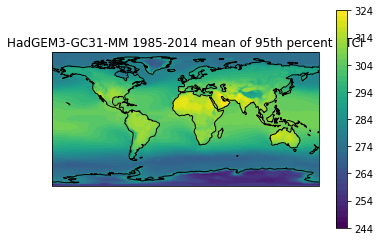

In [12]:
import cartopy.crs as ccrs
ax = pl.axes(projection=ccrs.PlateCarree())

pl.contourf(
    cube_model_historical_mean['HadGEM3-GC31-MM']['r1i1p1f3'].coord('longitude').points,
    cube_model_historical_mean['HadGEM3-GC31-MM']['r1i1p1f3'].coord('latitude').points,
    cube_model_historical_mean['HadGEM3-GC31-MM']['r1i1p1f3'][0,...].data,
    40,
    transform=ccrs.PlateCarree())
ax.coastlines()
pl.title('HadGEM3-GC31-MM 1985-2014 mean of 95th percent UTCI')
pl.colorbar()

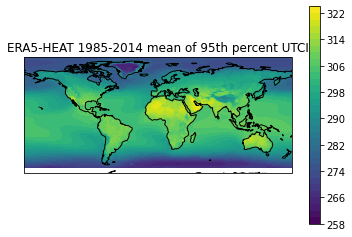

In [21]:
ax = pl.axes(projection=ccrs.PlateCarree())

pl.contourf(cube_era5_mean.coord('longitude').points, cube_era5_mean.coord('latitude').points, cube_era5_mean.data[0,...], 40,
             transform=ccrs.PlateCarree())
pl.title('ERA5-HEAT 1985-2014 mean of 95th percent UTCI')
ax.coastlines()
pl.colorbar()

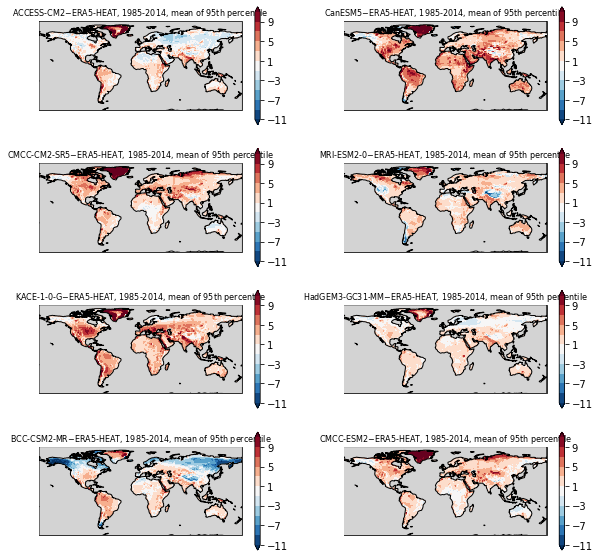

In [15]:
pl.figure(figsize=(10, 10))
#ax = pl.axes(projection=ccrs.PlateCarree())

for i, model in enumerate(scenarios):
    for run in scenarios[model]:

        ax = pl.subplot(4, 2, i+1, projection=ccrs.PlateCarree())
        cf = ax.contourf(
            cube_era5_mean.coord('longitude').points,
            cube_era5_mean.coord('latitude').points,
            cube_model_historical_mean[model][run][0,...].data-cube_era5_mean[0,...].data,
            np.arange(-11,12,2), 
            cmap=pl.cm.RdBu_r,
            extend='both',
            transform=ccrs.PlateCarree()
        )
        ax.add_feature(cartopy.feature.OCEAN, zorder=100, edgecolor='k', facecolor='lightgray')
        pl.colorbar(cf)
        ax.set_title('%s$-$ERA5-HEAT, 1985-2014, mean of 95th percentile' % model, fontsize=8)

pl.savefig('/home/users/pmcjs/model_bias_percentiles.png')

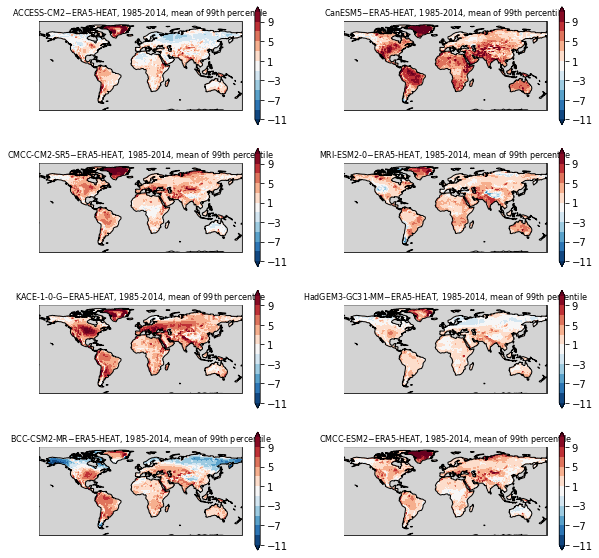

In [16]:
pl.figure(figsize=(10, 10))
#ax = pl.axes(projection=ccrs.PlateCarree())

for i, model in enumerate(scenarios):
    for run in scenarios[model]:

        ax = pl.subplot(4, 2, i+1, projection=ccrs.PlateCarree())
        cf = ax.contourf(
            cube_era5_mean.coord('longitude').points,
            cube_era5_mean.coord('latitude').points,
            cube_model_historical_mean[model][run][2,...].data-cube_era5_mean[2,...].data,
            np.arange(-11,12,2), 
            cmap=pl.cm.RdBu_r,
            extend='both',
            transform=ccrs.PlateCarree()
        )
        ax.add_feature(cartopy.feature.OCEAN, zorder=100, edgecolor='k', facecolor='lightgray')
        pl.colorbar(cf)
        ax.set_title('%s$-$ERA5-HEAT, 1985-2014, mean of 99th percentile' % model, fontsize=8)

pl.savefig('/home/users/pmcjs/model_bias_percentiles_99.png')